# Modeling - selection of the best models with default settings

#### Importing necessary libraries:

In [1]:
import functions
import pandas as pd
import numpy as np
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

#### Loading sets:

In [2]:
data_scaled = pd.read_csv(r'./data/data_scaled.csv', delimiter = ';')

#### Split dataset into train and test subsets:

In [3]:
y = data_scaled['y']
X_scaled = data_scaled.drop(['y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 100, stratify = y)

## Examinig baseline models with default settings:

In [4]:
results_wds = {}

#### Logistic Regression (with default settings):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.66      0.24      0.36       928

    accuracy                           0.90      8236
   macro avg       0.79      0.61      0.65      8236
weighted avg       0.88      0.90      0.88      8236

Confusion Matrix:
AUC: 0.58
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


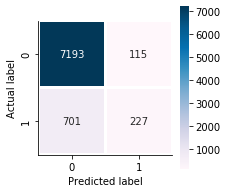

In [5]:
model_LR_wds = functions.vis_results(LogisticRegression(), X_train, X_test, y_train, y_test)
results_wds.update(dict(functions.model_result(model_LR_wds)))

#### Decision Tree Classifier (with default settings):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      7308
           1       0.31      0.32      0.31       928

    accuracy                           0.84      8236
   macro avg       0.61      0.61      0.61      8236
weighted avg       0.85      0.84      0.84      8236

Confusion Matrix:
AUC: 0.23
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


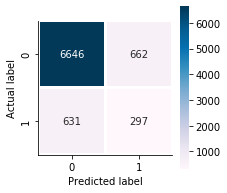

In [6]:
model_DTC_wds = functions.vis_results(DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
results_wds.update(dict(functions.model_result(model_DTC_wds)))

#### Random Forest Classifier (with default settings):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      7308
           1       0.53      0.29      0.37       928

    accuracy                           0.89      8236
   macro avg       0.72      0.63      0.66      8236
weighted avg       0.87      0.89      0.88      8236

Confusion Matrix:
AUC: 0.54
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


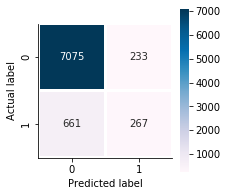

In [7]:
model_RFC_wds = functions.vis_results(RandomForestClassifier(), X_train, X_test, y_train, y_test)
results_wds.update(dict(functions.model_result(model_RFC_wds)))

#### SVM (with default settings):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7308
           1       0.64      0.22      0.33       928

    accuracy                           0.90      8236
   macro avg       0.78      0.60      0.64      8236
weighted avg       0.88      0.90      0.88      8236

Confusion Matrix:
AUC: 0.41
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


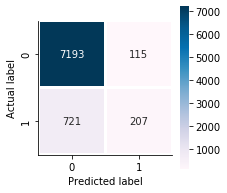

In [8]:
model_SVM_wds = functions.vis_results(SVC(probability=True), X_train, X_test, y_train, y_test)
results_wds.update(dict(functions.model_result(model_SVM_wds)))

#### XGB Classifier (with default settings):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7308
           1       0.68      0.25      0.36       928

    accuracy                           0.90      8236
   macro avg       0.80      0.62      0.65      8236
weighted avg       0.89      0.90      0.88      8236

Confusion Matrix:
AUC: 0.60
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)


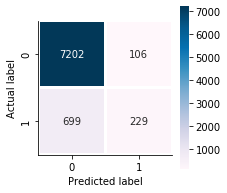

In [9]:
model_XGB_wds = functions.vis_results(XGBClassifier(), X_train, X_test, y_train, y_test)
results_wds.update(dict(functions.model_result(model_XGB_wds)))

### Results:#

In [10]:
results_wds = pd.DataFrame(data=results_wds).T
results_wds.reset_index(inplace=True)
results_wds.columns = ['Model', 'ACC', 'AUC', 'PRECISION_ALL', 'RECALL_ALL', 'F1_ALL', 'PRECISION_1', 'RECALL_1', 'F1_1']
results_wds

,Model,ACC,AUC,PRECISION_ALL,RECALL_ALL,F1_ALL,PRECISION_1,RECALL_1,F1_1
0,LogisticRegression,0.900923,0.577172,0.883316,0.900923,0.879974,0.663743,0.244612,0.357480
1,DecisionTreeClassifier,0.843006,0.231810,0.845278,0.843006,0.844129,0.309698,0.320043,0.314785
2,RandomForestClassifier,0.891452,0.535721,0.871676,0.891452,0.876729,0.534000,0.287716,0.373950
3,SVC,0.898494,0.412184,0.878919,0.898494,0.875910,0.642857,0.223060,0.331200
4,XGBClassifier,0.902258,0.597292,0.885846,0.902258,0.881218,0.683582,0.246767,0.362629


### Save results:

In [11]:
results_wds.to_csv(r'./results/results_wds.csv', sep=';', index=False)

### Save models using pickle library:

In [12]:
with open(f'./models/model_LR_wds.pickle', 'wb') as f:
    pickle.dump(model_LR_wds[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_DTC_wds.pickle', 'wb') as f:
    pickle.dump(model_DTC_wds[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_RFC_wds.pickle', 'wb') as f:
    pickle.dump(model_RFC_wds[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_SVM_wds.pickle', 'wb') as f:
    pickle.dump(model_SVM_wds[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_XGB_wds.pickle', 'wb') as f:
    pickle.dump(model_XGB_wds[0], f, pickle.HIGHEST_PROTOCOL)